# embedding

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from plantclef.config import get_device

print(f"PyTorch Version: {torch.__version__}")
device = get_device()
print(f"Using device: {device}")

PyTorch Version: 2.6.0
Using device: mps


In [3]:
import pandas as pd
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path().resolve().parents[0]
print(root)
! date

/Users/mgustineli/github/pytorch-plantclef
Mon Mar 24 17:43:13 EDT 2025


In [4]:
# path to data
data_path = f"{root}/data/parquet"
train_path = f"{data_path}/train_pytorch_webinar_filtered"
test_path = f"{data_path}/test_2025_pytorch_webinar"

# read train/test data
train_df = pd.read_parquet(train_path)
test_df = pd.read_parquet(test_path)

# display data
print(f"Train DF shape: {train_df.shape}")
print(f"Test DF shape: {test_df.shape}")
display(train_df.head(3))
display(test_df.head(3))

Train DF shape: (2020, 22)
Test DF shape: (200, 3)


image_name  \
0  28e2fbd0cc93d82d7de3ed5783c64816074955e0.jpg   
1  47b5db375e741fdc09b5e133d5bfef0285aa695c.jpg   
2  c6a6b172ab03374ad1bb713b7e7b37dd84f094a1.jpg   

                                                path  \
0  /PlantCLEF2024/train/1356404/28e2fbd0cc93d82d7...   
1  /PlantCLEF2024/train/1418612/47b5db375e741fdc0...   
2  /PlantCLEF2024/train/1722578/c6a6b172ab03374ad...   

                                                data  organ  species_id  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   leaf     1356404   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  habit     1418612   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  habit     1722578   

       obs_id                                         license partner  \
0  1000992998                                        cc-by-sa    None   
1  2634386735  http://creativecommons.org/licenses/by-nc/4.0/    None   
2  3802273349     http://creativecommons.org/licenses/by/4.0/    None   

                  author  altitude  ...  gbif_species_id  \
0                 carloz      60.0  ...        5275012.0   
1           René Stalder       NaN  ...        2728572.0   
2  Eleftherios Katsillis       NaN  ...        8241209.0   

                                 species      genus            family  \
0          Pteridium aquilinum (L.) Kuhn  Pteridium  Dennstaedtiaceae   
1                       Carex firma Host      Carex        Cyperaceae   
2  Daucus pumilus (L.) Hoffmanns. & Link     Daucus          Apiaceae   

    dataset    publisher                                         references  \
0  plantnet     plantnet  https://identify.plantnet.org/fr/k-southwester...   
1      gbif  iNaturalist        https://www.inaturalist.org/photos/75173958   
2      gbif  iNaturalist       https://www.inaturalist.org/photos/121766424   

                                                 url learn_tag  \
0  https://bs.plantnet.org/image/o/28e2fbd0cc93d8...     train   
1  https://inaturalist-open-data.s3.amazonaws.com...     train   
2  https://inaturalist-open-data.s3.amazonaws.com...     train   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
1  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
2  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  

[3 rows x 22 columns]

image_name  \
0     CBN-PdlC-C4-20180723.jpg   
1  LISAH-BOU-0-30-20230512.jpg   
2     CBN-PdlC-C4-20140811.jpg   

                                                path  \
0  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
1  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
2  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   

                                                data  
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
1  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...

### extract embeddings from single-labe training images

In [5]:
# limit to 5 samples for testing
limit_train_df = train_df.head(2)
print(f"Limit DF shape: {limit_train_df.shape}")

Limit DF shape: (2, 22)


In [7]:
from plantclef.embed.workflow import pl_trainer_pipeline, torch_pipeline

# extract embeddings
embeddings, logits = torch_pipeline(
    limit_train_df,
    batch_size=2,
    use_grid=False,
    cpu_count=1,
)

Extracting embeddings and logits: 100%|██████████| 1/1 [00:03<00:00,  3.15s/batch]


In [8]:
# embeddings shape
embeddings.shape

torch.Size([2, 1, 768])

In [9]:
# first embedding
embeddings[0][0][:100]  # showing first 100 values out of 768

tensor([ 0.2208, -0.5153,  0.7585,  0.9093,  0.2313,  0.5153,  0.3677,  0.4263,
        -0.0589, -0.6421, -0.6647, -0.5084, -0.0336,  0.0860, -0.2964,  0.1818,
         0.6770, -0.0759, -0.9086, -0.3379,  0.1785, -0.7481,  0.1387,  0.5420,
         0.1749,  0.5241, -0.3866,  0.2234, -0.2358,  0.4200,  0.3578, -0.6095,
        -0.0023, -0.4033, -0.0548,  0.2943, -0.6235, -0.2170,  0.2362, -0.0920,
        -1.6286, -0.0585,  0.4292,  1.1885, -0.1262,  0.2304, -0.4156, -0.6521,
         0.6003, -0.5808, -0.3252, -0.1956,  0.0486, -0.2876, -1.7804,  0.2038,
         1.2598,  0.9500,  0.8922,  0.3677, -0.0940, -0.0242,  0.3709, -0.2201,
        -0.0589,  0.2274, -0.2577, -0.0933,  0.5743,  0.3995,  0.4034, -0.4225,
        -0.0215,  0.5615,  0.1917, -0.0354, -0.0381, -0.1078, -0.3843,  0.0311,
        -0.4937,  0.5553,  1.0642, -0.0255,  0.2234, -0.4111,  0.4894,  0.4194,
         0.3164,  0.0771, -0.0844, -0.1962,  0.5074,  0.0943,  0.0467,  0.8129,
         0.4786, -0.5332, -0.4785, -0.06

In [10]:
# create embeddings dataframe
cols = ["image_name", "data", "species", "species_id"]
embeddings_df = limit_train_df[cols].copy()
embeddings_df["embeddings"] = embeddings.tolist()
embeddings_df.head(2)

image_name  \
0  28e2fbd0cc93d82d7de3ed5783c64816074955e0.jpg   
1  47b5db375e741fdc09b5e133d5bfef0285aa695c.jpg   

                                                data  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                         species  species_id  \
0  Pteridium aquilinum (L.) Kuhn     1356404   
1               Carex firma Host     1418612   

                                          embeddings  
0  [[0.22075578570365906, -0.5152615308761597, 0....  
1  [[0.5589325428009033, 0.1927482783794403, 0.89...

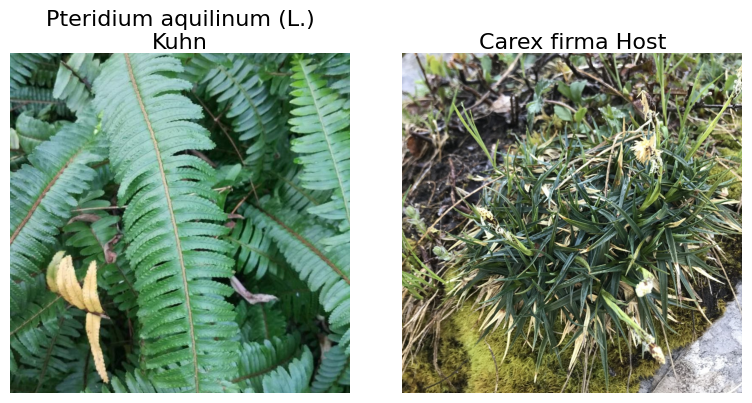

In [11]:
from plantclef.plotting import plot_images_from_binary

plot_images_from_binary(
    embeddings_df,
    data_col="data",
    label_col="species",
    grid_size=(1, 2),
    crop_square=True,
    figsize=(8, 4),
)

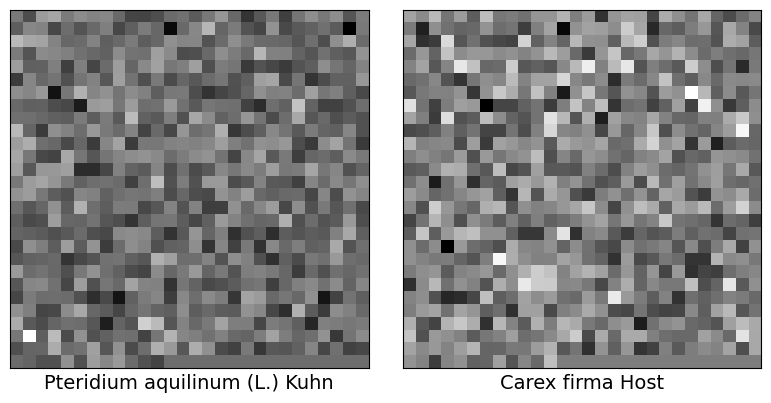

In [12]:
from plantclef.plotting import plot_embeddings

plot_embeddings(
    embeddings_df,
    data_col="embeddings",
    label_col="species",
    grid_size=(1, 2),
    figsize=(8, 4),
)

## grid of image tiles using the test set

In [50]:
# set params
USE_GRID = True
GRID_SIZE = 3  # 3x3 grid of tiles
CPU_COUNT = 1  # custom cpu_count
TOP_K = 5  # top-K logits for each tile

# select images from test set
image_names = ["CBN-Pyr-03-20230706.jpg", "CBN-can-E6-20230706.jpg"]
test_image_df = test_df[test_df["image_name"].isin(image_names)]

# get embeddings and logits
embeddings, logits = torch_pipeline(
    test_image_df,
    batch_size=2,
    use_grid=USE_GRID,
    grid_size=GRID_SIZE,
    cpu_count=CPU_COUNT,
    top_k=TOP_K,
)

Extracting embeddings and logits: 100%|██████████| 1/1 [00:06<00:00,  6.14s/batch]


In [51]:
# embeddings shape
embeddings.shape  # (2, 9, 768)

torch.Size([2, 9, 768])

In [52]:
# create embeddings dataframe
def explode_embeddings_logits(
    df: pd.DataFrame,
    embeddings: torch.Tensor,
    logits: list,
    cols: list = ["image_name", "data"],
) -> pd.DataFrame:
    # create dataframe
    pred_df = df[cols].copy()
    pred_df["embeddings"] = embeddings.cpu().tolist()
    pred_df["logits"] = logits
    # explode embeddings
    explode_df = pred_df.explode(["embeddings", "logits"], ignore_index=True)
    # assign tile number for each image
    explode_df["tile"] = explode_df.groupby("image_name").cumcount()
    return explode_df

In [53]:
explode_df = explode_embeddings_logits(test_image_df, embeddings, logits)
explode_df.head(9)

image_name                                               data  \
0  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
1  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
2  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
3  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
4  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
5  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
6  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
7  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
8  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   

                                          embeddings  \
0  [2.5109221935272217, -0.46886831521987915, -0....   
1  [0.4602768123149872, 0.5199960470199585, -0.21...   
2  [0.8263758420944214, 0.855131983757019, -1.082...   
3  [2.3111977577209473, 0.287236750125885, 0.8441...   
4  [1.01568603515625, 0.1487639844417572, 0.57687...   
5  [0.5194851160049438, -0.04226940870285034, 0.2...   
6  [0.5967509746551514, -0.487720787525177, 0.167...   
7  [0.029867023229599, 0.7805190682411194, -0.663...   
8  [1.4826017618179321, 0.6403757929801941, 0.029...   

                                              logits  tile  
0  {'1580587': 0.08392123132944107, '1392323': 0....     0  
1  {'1396784': 0.16168425977230072, '1397512': 0....     1  
2  {'1396015': 0.09582242369651794, '1395973': 0....     2  
3  {'1651363': 0.2529003918170929, '1361281': 0.1...     3  
4  {'1741624': 0.5019134879112244, '1580587': 0.3...     4  
5  {'1741624': 0.20808552205562592, '1580587': 0....     5  
6  {'1741624': 0.2158067375421524, '1580587': 0.1...     6  
7  {'1741624': 0.2340453416109085, '1580587': 0.0...     7  
8  {'1741624': 0.24523599445819855, '1580587': 0....     8

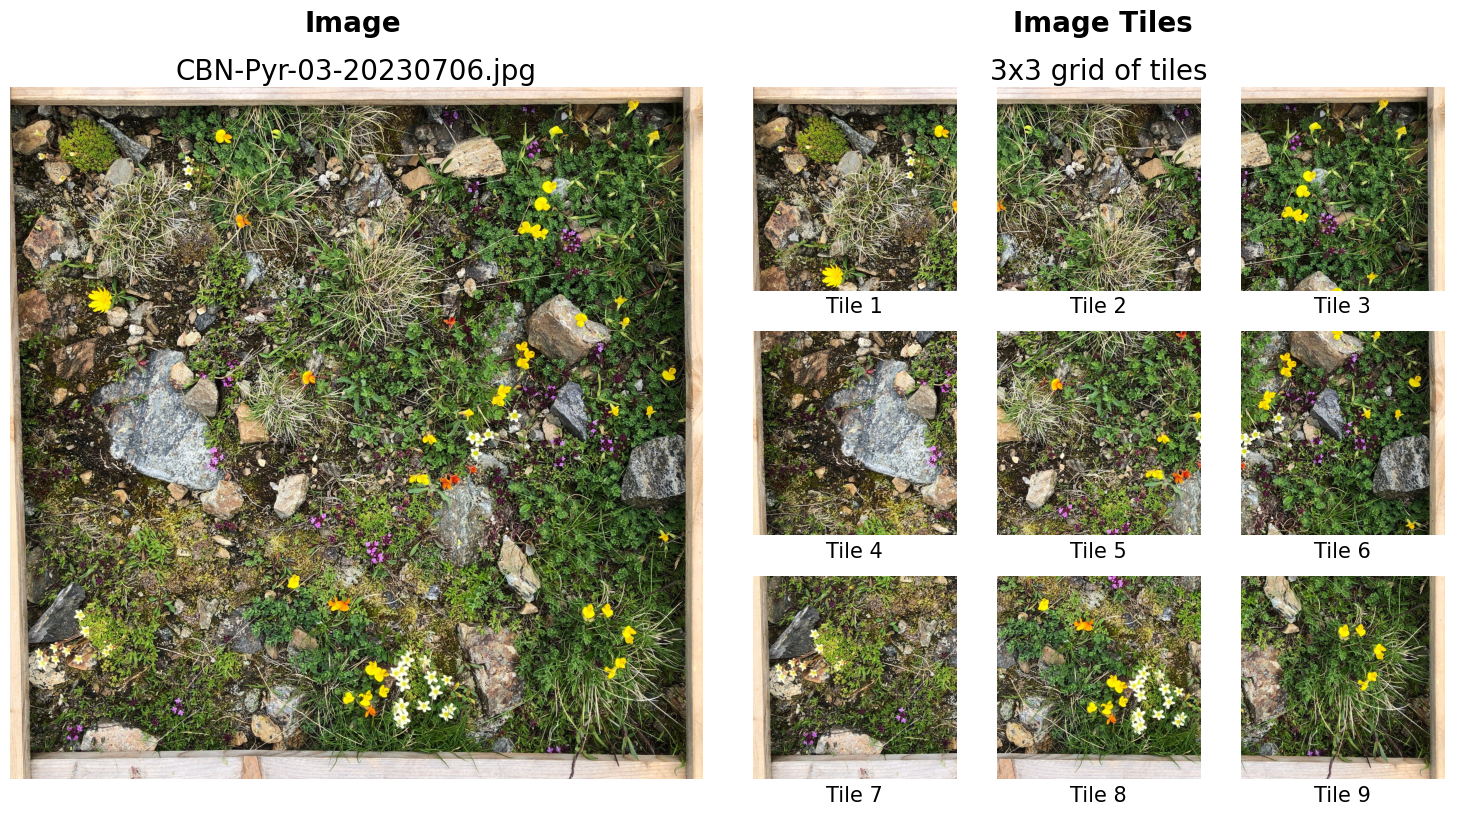

In [54]:
from plantclef.plotting import plot_image_tiles

# show image tiles
plot_image_tiles(
    explode_df,
    data_col="data",
    grid_size=3,
)

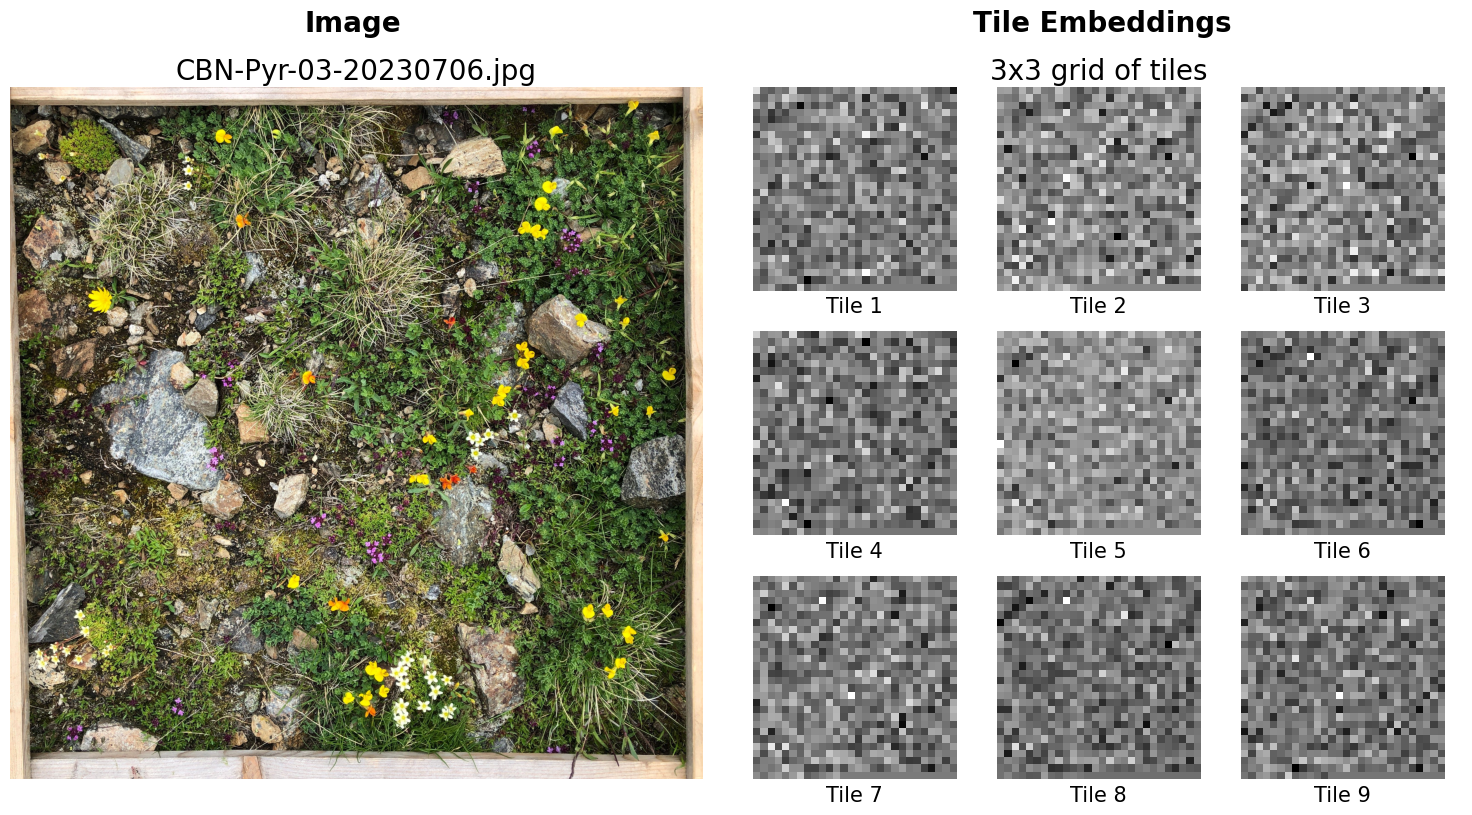

In [55]:
from plantclef.plotting import plot_embed_tiles

plot_embed_tiles(
    explode_df,
    data_col="embeddings",
    grid_size=3,
    figsize=(15, 8),
)

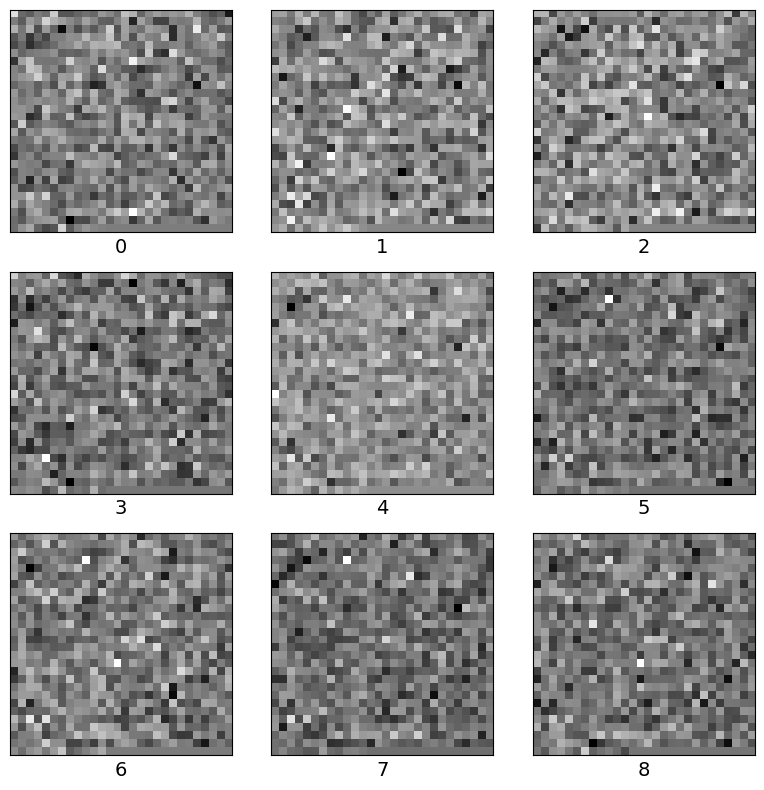

In [56]:
# plot grid embeddings
plot_embeddings(
    explode_df,
    data_col="embeddings",
    label_col="tile",
    grid_size=(3, 3),
    figsize=(8, 8),
)

### logits of the classifier

In [57]:
print(f"Length logits: {len(logits)}")

Length logits: 2


In [58]:
# display logits of first tile
explode_df["logits"].iloc[0]

{'1580587': 0.08392123132944107,
 '1392323': 0.05435767397284508,
 '1741624': 0.03535231202840805,
 '1580588': 0.033031169325113297,
 '1519650': 0.03258587419986725}

In [59]:
# display logits for each tile
for i in range(9):
    logits = explode_df["logits"].iloc[i]
    logits_formatted = {k: round(v, 3) for k, v in logits.items()}
    print(f"Tile {i}: {logits_formatted}")

Tile 0: {'1580587': 0.084, '1392323': 0.054, '1741624': 0.035, '1580588': 0.033, '1519650': 0.033}
Tile 1: {'1396784': 0.162, '1397512': 0.122, '1390074': 0.036, '1397208': 0.033, '1398690': 0.025}
Tile 2: {'1396015': 0.096, '1395973': 0.053, '1395945': 0.035, '1362192': 0.033, '1395949': 0.025}
Tile 3: {'1651363': 0.253, '1361281': 0.131, '1392323': 0.129, '1580587': 0.06, '1361372': 0.022}
Tile 4: {'1741624': 0.502, '1580587': 0.312, '1394282': 0.016, '1580588': 0.01, '1412585': 0.005}
Tile 5: {'1741624': 0.208, '1580587': 0.105, '1396784': 0.059, '1397208': 0.031, '1397512': 0.03}
Tile 6: {'1741624': 0.216, '1580587': 0.145, '1397512': 0.074, '1580630': 0.025, '1580588': 0.025}
Tile 7: {'1741624': 0.234, '1580587': 0.091, '1396023': 0.046, '1397512': 0.033, '1412585': 0.031}
Tile 8: {'1741624': 0.245, '1580587': 0.217, '1580588': 0.053, '1697232': 0.012, '1697332': 0.01}


## embed entire test set using grid approach

In [ ]:
import os

cpu_count = os.cpu_count()
print(f"CPU count: {cpu_count}")

In [ ]:
# params
USE_GRID = True
GRID_SIZE = 3  # 3x3 grid of tiles
CPU_COUNT = 1  # custom cpu_count
TOP_K = 5  # top-K logits for each tile

# get embeddings and logits
test_embeddings, test_logits = pl_trainer_pipeline(
    test_df,
    batch_size=10,  # 10 imamges per batch
    use_grid=USE_GRID,
    grid_size=GRID_SIZE,
    cpu_count=CPU_COUNT,
    top_k=TOP_K,
)

In [ ]:
print(test_embeddings.shape)
print(len(test_logits))

In [ ]:
# explode full embeddings and logits
test_explode_df = explode_embeddings_logits(
    test_df,
    test_embeddings,
    test_logits,
)

In [ ]:
print(test_explode_df.shape)
test_explode_df.head(9)

In [ ]:
plot_embed_tiles(
    test_explode_df,
    data_col="embeddings",
    grid_size=3,
)

### write dataframe to parquet

In [ ]:
import json
import numpy as np


def write_embeddings_to_parquet(
    df: pd.DataFrame,
    folder_name: str,
    num_partitions: int = 20,
):
    # path to data
    root = Path().resolve().parents[0]
    data_path = f"{root}/data/embeddings"
    output_path = f"{data_path}/{folder_name}"

    # # remove existing data if it exists to avoid duplication
    # if Path(output_path).exists():
    #     shutil.rmtree(output_path, ignore_errors=True)

    # convert logits to json strings
    df["logits"] = df["logits"].apply(json.dumps)

    # assign partition numbers (0 to num_partitions-1)
    df_size = len(df)
    df["partition"] = np.repeat(
        np.arange(num_partitions), np.ceil(df_size / num_partitions)
    )[:df_size]

    # write to parquet using the new partition column
    df.to_parquet(output_path, partition_cols=["partition"], index=False)

    print(
        f"Embedding dataset written to: {output_path} with {num_partitions} partitions."
    )


# write data
folder_name = f"test_grid_{GRID_SIZE}x{GRID_SIZE}_embeddings"
write_embeddings_to_parquet(test_explode_df, folder_name, num_partitions=10)

## embed entire train images

In [ ]:
# params
USE_GRID = False
CPU_COUNT = 1  # custom cpu_count
TOP_K = 5  # top-K logits for each tile

# get embeddings and logits
train_embeddings, train_logits = pl_trainer_pipeline(
    train_df,
    batch_size=200,  # 200 imamges per batch
    use_grid=USE_GRID,
    cpu_count=CPU_COUNT,
    top_k=TOP_K,
)

In [ ]:
print(train_embeddings.shape)
print(len(train_logits))

In [ ]:
# explode full embeddings and logits
train_explode_df = explode_embeddings_logits(
    train_df,
    train_embeddings,
    train_logits,
    cols=["image_name", "data", "species", "species_id"],
)

In [ ]:
train_explode_df.head(5)

In [ ]:
from plantclef.plotting import plot_single_image_embeddings

plot_single_image_embeddings(
    train_explode_df,
    num_images=2,
    figsize=(8, 10),
)

### write train embeddings to parquet

In [ ]:
# write data
folder_name = "train_embeddings"
write_embeddings_to_parquet(train_explode_df, folder_name, num_partitions=20)

In [ ]:
# path to data
data_path = f"{root}/data/embeddings"
# output_path = f"{data_path}/test_grid_3x3_embeddings"
output_path = f"{data_path}/train_embeddings"

train_emb_df = pd.read_parquet(output_path)
print(train_emb_df.shape)
train_emb_df.head(5)

In [ ]:
output_path = f"{data_path}/test_grid_3x3_embeddings"
test_grid_df = pd.read_parquet(output_path)
print(test_grid_df.shape)
test_grid_df.head(5)